In [228]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
best = pd.read_csv('./submission/bomin.csv')
my = pd.read_csv('./submission/tta-25E-val0.9599-axistrans-randrotate-randsample-jitter-scale-axis-voxelnet.csv')

In [190]:
my[my['label'] == best['label']].shape[0] / len(my) 

0.743375

# Test 공간~.,~

In [435]:
import torch
a = torch.load('./ckpt/20E-val0.9475-randsample-jitter-scale-axis-voxelnet.pth')
a["optimizer_state_dict"]

{'state': {0: {'step': 14375,
   'exp_avg': tensor([[-8.0469e-03,  2.1064e-02,  6.7053e-04,  5.6052e-45, -3.9211e-03,
             1.1480e-03, -9.2957e-05],
           [ 2.7975e-02, -3.0204e-02,  5.0959e-02,  2.8026e-45, -4.3392e-04,
             3.4662e-03, -2.6928e-03],
           [-1.4436e-02, -1.1042e-02, -2.4558e-02,  4.2039e-45, -1.5535e-03,
             3.2976e-03, -3.5674e-04],
           [ 3.9612e-03,  1.6295e-02,  9.3980e-03,  2.8026e-45, -1.1282e-04,
             2.5799e-03, -6.4227e-04],
           [-6.4955e-03, -1.8636e-02,  6.6501e-03, -2.8026e-45,  6.2000e-03,
             1.7564e-03,  4.2134e-03],
           [-3.8734e-03, -1.6562e-02,  3.8414e-02,  2.8026e-45, -3.0469e-03,
            -1.0227e-03, -3.4807e-03],
           [-6.1952e-03, -6.6652e-03, -1.1243e-03, -4.2039e-45, -2.2966e-03,
             1.0936e-03,  5.1782e-03],
           [ 1.2312e-03,  9.7252e-03, -7.2366e-03,  2.8026e-45,  1.5284e-03,
            -2.8402e-04,  3.3811e-04],
           [-1.5118e-01,  9.166

In [52]:
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['1']

display(np.array(points))
points += np.random.uniform(0, 0.02, size=points.shape)
display(points)

array([[ 0.15      ,  0.02270992,  0.52146947],
       [ 0.15      ,  0.03520992,  0.52146947],
       [ 0.15      ,  0.04770992,  0.52146947],
       ...,
       [ 0.15      , -0.02729008, -0.45353053],
       [ 0.15      , -0.02729008, -0.46603053],
       [ 0.15      , -0.02729008, -0.47853053]])

array([[ 0.16899407,  0.04057691,  0.5222015 ],
       [ 0.1611582 ,  0.03788077,  0.52464026],
       [ 0.15300149,  0.05878495,  0.53850716],
       ...,
       [ 0.15501116, -0.00905589, -0.43970114],
       [ 0.16363132, -0.01251821, -0.46569034],
       [ 0.1644186 , -0.02103537, -0.47354655]])

In [89]:
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['1']
reduce_rate = 0.3
print(int(points.shape[0] * reduce_rate))
a = np.sort(np.random.choice(points.shape[0], int(points.shape[0] * reduce_rate) , replace=False))
print(a)
points = points[a, : ]
points.shape

7860
[    1     6    17 ... 26185 26198 26199]


(7860, 3)

In [124]:
_p = np.random.uniform(0, 1)
_p

0.5390863113008126

In [436]:
import torch



optimizer = torch.optim.Adam(params = [torch.tensor(1)], lr = 1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 
                                                      T_max=10,
                                                      eta_min=1e-4)
# s2 = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
#                                         lr_lambda=lambda epoch: 0.95 ** epoch,
#                                         last_epoch=-1,
#                                         verbose=False)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
epoch = 40
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: 0.95 ** epoch)
optimizer.param_groups[0]['lr'] = 1e-5
lrs = []
for _ in range(epoch):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()


In [434]:
optimizer.param_groups

[{'params': [tensor(1)],
  'lr': 0.0001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'initial_lr': 0.0001}]

In [432]:
lrs

[1e-05,
 9.5e-05,
 9.025e-05,
 8.573749999999999e-05,
 8.1450625e-05,
 7.737809374999998e-05,
 7.350918906249998e-05,
 6.983372960937497e-05,
 6.634204312890623e-05,
 6.30249409724609e-05,
 5.987369392383787e-05,
 5.688000922764597e-05,
 5.403600876626367e-05,
 5.1334208327950485e-05,
 4.876749791155295e-05,
 4.6329123015975305e-05,
 4.4012666865176535e-05,
 4.181203352191771e-05,
 3.972143184582182e-05,
 3.7735360253530726e-05,
 3.584859224085419e-05,
 3.405616262881148e-05,
 3.2353354497370904e-05,
 3.073568677250236e-05,
 2.919890243387724e-05,
 2.7738957312183377e-05,
 2.6352009446574204e-05,
 2.5034408974245492e-05,
 2.3782688525533216e-05,
 2.2593554099256555e-05,
 2.146387639429373e-05,
 2.039068257457904e-05,
 1.9371148445850086e-05,
 1.8402591023557583e-05,
 1.74824614723797e-05,
 1.6608338398760718e-05,
 1.577792147882268e-05,
 1.4989025404881546e-05,
 1.4239574134637468e-05,
 1.3527595427905592e-05]

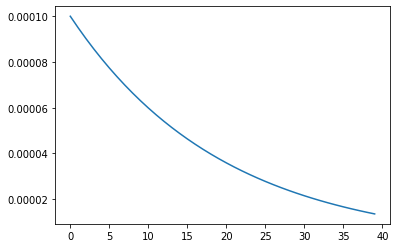

In [425]:
plt.plot([i for i in range(epoch)], lrs)

# Norm point visualize

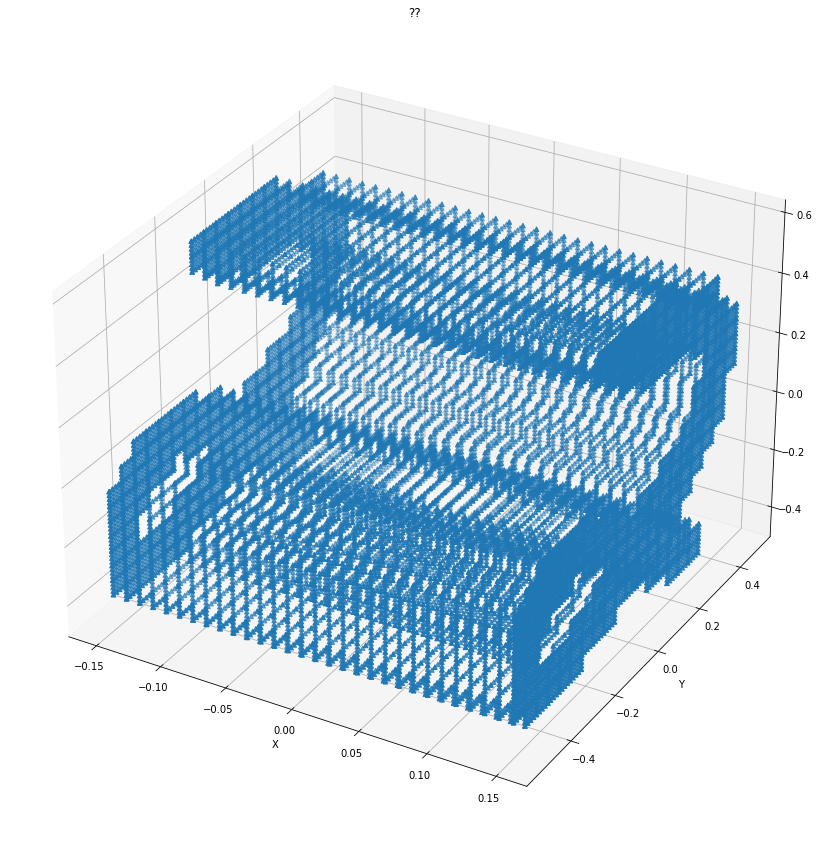

In [236]:
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['12823']
p = np.array(points)

train_range = np.array([(-0.1579, 0.1579), (-0.7023, 0.6843), (-0.6795, 0.6597)])
test_range = np.array([(-0.7839, 0.7732), (-0.7591, 0.7707), (-0.7849, 0.7697)])

x_range = np.random.uniform

f, axs = plt.subplots(1,1, figsize=(15, 15), subplot_kw={"projection":'3d'})
# axs = axs.flatten()
x = p[:,0]
y = p[:,1]
z = p[:,2]

axs.scatter(x,y,z, marker='^', cmap="inferno")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("??")
axs.view_init(elev=30.)

In [440]:
import numpy as np

In [663]:
train_range = np.array([(-0.1579, 0.1579), (-0.7023, 0.6843), (-0.6795, 0.6597)])
test_range = np.array([(-0.7839, 0.7732), (-0.7591, 0.7707), (-0.7849, 0.7697)])

all_points = h5py.File('./data/train.h5', 'r')
points = all_points['683']
p = np.array(points)

xyzmax = np.max(p, 0)
xyzmin = np.min(p, 0)
print(xyzmin, xyzmax)
print()
# pick = np.random.uniform(xyzmin[:], xyzmax[:], (5,3))
# display(pick)


r, s = np.linspace(xyzmin[:], xyzmax[:], num=64, endpoint=False, retstep=True)
# display(r)
# display(s)

x_pick = np.sort(np.random.choice(r[:, 0], 12))
y_pick = np.sort(np.random.choice(r[:, 1], 12))
z_pick = np.sort(np.random.choice(r[:, 2], 12))
print(x_pick)
print(y_pick)
print(z_pick)

[-0.15       -0.3517033  -0.59895604] [0.15       0.4482967  0.40104396]

[-0.140625  -0.1265625 -0.0984375 -0.0703125 -0.0375    -0.028125
 -0.0234375  0.01875    0.075      0.1125     0.121875   0.1265625]
[-0.3392033 -0.3267033 -0.1767033 -0.1517033 -0.0892033 -0.0517033
  0.0982967  0.1357967  0.1607967  0.3107967  0.3482967  0.4232967]
[-0.56770604 -0.38020604 -0.25520604 -0.20833104 -0.17708104  0.10416896
  0.10416896  0.15104396  0.15104396  0.16666896  0.16666896  0.30729396]


In [658]:
# for i in range(12) :
#     print(np.where(((x_pick[i]< points) & (points < x_pick[i] + s[0])))[0].shape)
#     print(np.where(((y_pick[i]< points) & (points < y_pick[i] + s[1])))[0].shape)
#     print(np.where(((z_pick[i]< points) & (points < z_pick[i] + s[2])))[0].shape)
#     print()

In [686]:
abc = []
for i in range(12):
    x_r = np.where(((x_pick[i]< points) & (points < x_pick[i] + s[0])))[0]
    print(x_r.shape)
    if x_r.shape[0] != 0 :
        abc.append(x_r)
z =np.concatenate(abc)
print(z.shape)
z = np.unique(z)
print(z.shape)

(850,)
(110,)
(500,)
(500,)
(610,)
(830,)
(0,)
(230,)
(610,)
(210,)
(430,)
(500,)
(5380,)
(5120,)


In [688]:
a = np.array([1,2,3,4,5,6,7,8,9,0])
a[[1,2,3]]

SyntaxError: invalid syntax (2901069224.py, line 2)